# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from matplotlib.colors import ListedColormap
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import LeaveOneOut

# Importing Data

In [2]:
dataset = pd.read_csv('../input/practical2-dataset/Practical-5/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Scaling

In [3]:
sc = StandardScaler()
X = sc.fit_transform(X)

# Test Train Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Kernel SVC

In [5]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [6]:
y_pred = classifier.predict(X_test)
acSco = accuracy_score(y_test, y_pred)

<AxesSubplot:>

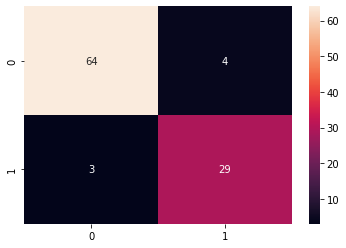

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

### K Fold

In [8]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.00 %
Standard Deviation: 6.83 %


### Repeated Fold

In [9]:
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=42)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = rkf)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.00 %
Standard Deviation: 2.54 %


### Stratified Split

In [10]:
skf = StratifiedKFold(n_splits=3)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.00 %
Standard Deviation: 3.56 %


### Leave One Out

In [11]:
loo = LeaveOneOut()
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = loo)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 29.55 %


### K Fold

In [12]:
kf = KFold(n_splits=2)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = kf)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 3.00 %


### Shuffle Split

In [13]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = cv)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.87 %
Standard Deviation: 5.00 %


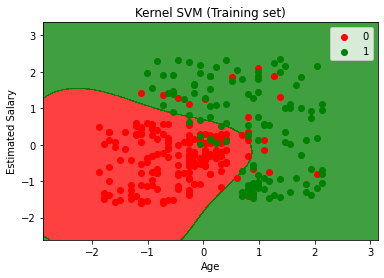

In [14]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

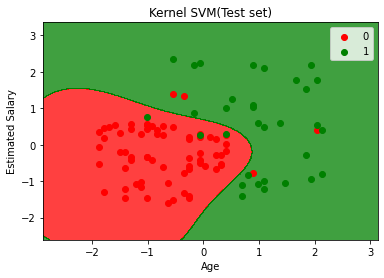

In [15]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()